In [80]:
import pandas as pd
import numpy as np

In [81]:
file_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/ventilation_cleaned_combi.csv'

# Load the CSV into a DataFrame
ventilation = pd.read_csv(file_path)

# Display the first few rows to confirm it loaded correctly
print(ventilation.head())

   subject_id   stay_id            charttime  itemid value  valuenum  \
0    10002428  38875437  2156-04-22 07:00:00  220339    10      10.0   
1    10002428  38875437  2156-04-22 07:00:00  223835    40      40.0   
2    10002428  38875437  2156-04-22 07:00:00  224685   437     437.0   
3    10002428  38875437  2156-04-22 07:00:00  224687     9       9.0   
4    10002428  38875437  2156-04-22 07:00:00  224688    22      22.0   

                     label  ext_success  
0                 PEEP set            1  
1     Inspired O2 Fraction            1  
2  Tidal Volume (observed)            1  
3            Minute Volume            1  
4   Respiratory Rate (Set)            1  


In [82]:
file_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/vitals_cleaned_combi.csv'

# Load the CSV into a DataFrame
vitals = pd.read_csv(file_path)

# Display the first few rows to confirm it loaded correctly
print(vitals.head())

   subject_id   stay_id            charttime  itemid  value  valuenum  \
0    10002428  38875437  2156-04-22 07:00:00  224689    0.0       0.0   
1    10002428  38875437  2156-04-22 09:00:00  224689   26.0      26.0   
2    10002428  38875437  2156-04-22 12:00:00  224689   24.0      24.0   
3    10002428  38875437  2156-04-22 13:00:00  224689   23.0      23.0   
4    10002428  38875437  2156-04-22 15:00:00  224689   22.0      22.0   

                            label  ext_success  
0  Respiratory Rate (spontaneous)            1  
1  Respiratory Rate (spontaneous)            1  
2  Respiratory Rate (spontaneous)            1  
3  Respiratory Rate (spontaneous)            1  
4  Respiratory Rate (spontaneous)            1  


In [83]:
file_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/bloodgas_cleaned_combi.csv'

# Load the CSV into a DataFrame
bloodgas = pd.read_csv(file_path)

# Display the first few rows to confirm it loaded correctly
print(bloodgas.head())

   subject_id            charttime  itemid  valuenum    label  ext_success
0    10002428  2156-04-12 10:29:00   50813       2.2  Lactate            1
1    10002428  2156-04-12 12:24:00   50813       2.0  Lactate            1
2    10002428  2156-04-12 19:49:00   50813       1.6  Lactate            1
3    10002428  2156-04-13 01:58:00   50813       1.5  Lactate            1
4    10002428  2156-04-13 06:23:00   50813       1.8  Lactate            1


In [84]:
file_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/fb_cleaned_combi.csv'

# Load the CSV into a DataFrame
fb = pd.read_csv(file_path)

# Display the first few rows to confirm it loaded correctly
print(fb.head())

   subject_id   stay_id   charttime  valuenum  itemid          label  \
0    10002428  33987268  2156-04-12    2545.0  123456  Fluid balance   
1    10002428  33987268  2156-04-13    5880.0  123456  Fluid balance   
2    10002428  33987268  2156-04-14    5713.0  123456  Fluid balance   
3    10002428  33987268  2156-04-15    1533.0  123456  Fluid balance   
4    10002428  33987268  2156-04-16      70.0  123456  Fluid balance   

   ext_success  
0            1  
1            1  
2            1  
3            1  
4            1  


In [85]:
file_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/neurology_cleaned_combi.csv'

# Load the CSV into a DataFrame
neurology = pd.read_csv(file_path)

# Display the first few rows to confirm it loaded correctly
print(neurology.head())

   subject_id   stay_id            charttime  valuenum  itemid  \
0    10002428  38875437  2156-04-21 20:00:00      -1.0  228096   
1    10002428  38875437  2156-04-21 20:00:00       3.0  220739   
2    10002428  38875437  2156-04-21 20:00:00       1.0  223900   
3    10002428  38875437  2156-04-21 20:00:00       6.0  223901   
4    10002428  38875437  2156-04-22 00:00:00       3.0  220739   

                   label  ext_success  
0     Richmond-RAS Scale            1  
1      GCS - Eye Opening            1  
2  GCS - Verbal Response            1  
3   GCS - Motor Response            1  
4      GCS - Eye Opening            1  


In [86]:
file_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/lab_cleaned_combi.csv'

# Load the CSV into a DataFrame
lab = pd.read_csv(file_path)

# Display the first few rows to confirm it loaded correctly
print(lab.head())

   subject_id            charttime  itemid  valuenum              label  \
0    10002428  2154-08-12 12:10:00   51200       1.1        Eosinophils   
1    10002428  2154-08-12 12:10:00   51221      35.2         Hematocrit   
2    10002428  2154-08-12 12:10:00   51222      11.8         Hemoglobin   
3    10002428  2154-08-12 12:10:00   51265     344.0     Platelet Count   
4    10002428  2154-08-12 12:10:00   51301       7.8  White Blood Cells   

   ext_success  
0            1  
1            1  
2            1  
3            1  
4            1  


In [87]:
# Remove itemid 224684
ventilation = ventilation[ventilation['itemid'] != 224684]

# Map itemids to merged values
itemid_mapping = {
    224370: 224369,
    224373: 224369,
    220339: 224700
}

# Apply mapping
ventilation['itemid'] = ventilation['itemid'].replace(itemid_mapping)

labels_to_remove = ["Sputum Consistency", "Sputum Color", "Total PEEP Level"]
ventilation = ventilation[~ventilation['label'].isin(labels_to_remove)]

In [88]:
ventilation['charttime'] = pd.to_datetime(ventilation['charttime'], errors='coerce')
bloodgas['charttime'] = pd.to_datetime(bloodgas['charttime'], errors='coerce')
vitals['charttime'] = pd.to_datetime(vitals['charttime'], errors='coerce')
fb['charttime'] = pd.to_datetime(fb['charttime'], errors='coerce')
neurology['charttime'] = pd.to_datetime(neurology['charttime'], errors='coerce')
lab['charttime'] = pd.to_datetime(lab['charttime'], errors='coerce')

In [89]:
# Compute ventilation windows by subject_id and stay_id
ventilation_windows = (
    ventilation
    .groupby(['subject_id', 'stay_id'])['charttime']
    .agg(['min', 'max'])
    .reset_index()
    .rename(columns={'min': 'vent_start', 'max': 'vent_end'})
)

# Filter vitals (has stay_id)
vitals_filtered = vitals.merge(ventilation_windows, on=['subject_id', 'stay_id'], how='inner')
vitals_filtered = vitals_filtered[
    (vitals_filtered['charttime'] >= vitals_filtered['vent_start']) &
    (vitals_filtered['charttime'] <= vitals_filtered['vent_end'])
]
vitals_filtered = vitals_filtered.drop(columns=['vent_start', 'vent_end'])

# Filter fb 
fb_filtered = fb.merge(ventilation_windows, on=['subject_id', 'stay_id'], how='inner')
fb_filtered = fb_filtered[
    (fb_filtered['charttime'] >= fb_filtered['vent_start']) &
    (fb_filtered['charttime'] <= fb_filtered['vent_end'])
]
fb_filtered = fb_filtered.drop(columns=['vent_start', 'vent_end'])

# Filter neurology 
neurology_filtered = neurology.merge(ventilation_windows, on=['subject_id', 'stay_id'], how='inner')
neurology_filtered = neurology_filtered[
    (neurology_filtered['charttime'] >= neurology_filtered['vent_start']) &
    (neurology_filtered['charttime'] <= neurology_filtered['vent_end'])
]
neurology_filtered = neurology_filtered.drop(columns=['vent_start', 'vent_end'])

# Map stay_id to bloodgas using charttime within ventilation window
def map_stay_ids(bloodgas_df, vent_windows):
    mapped_chunks = []

    for _, row in vent_windows.iterrows():
        sid = row['subject_id']
        stay = row['stay_id']
        start = row['vent_start']
        end = row['vent_end']

        match = bloodgas_df[
            (bloodgas_df['subject_id'] == sid) &
            (bloodgas_df['charttime'] >= start) &
            (bloodgas_df['charttime'] <= end)
        ].copy()

        if not match.empty:
            match['stay_id'] = stay
            mapped_chunks.append(match)

    if mapped_chunks:
        return pd.concat(mapped_chunks, ignore_index=True)
    else:
        return pd.DataFrame(columns=bloodgas_df.columns.tolist() + ['stay_id'])

# Apply mapping function
bloodgas_mapped = map_stay_ids(bloodgas, ventilation_windows)

# Map stay_id to lab using charttime within ventilation window
def map_stay_ids(lab_df, vent_windows):
    mapped_chunks = []

    for _, row in vent_windows.iterrows():
        sid = row['subject_id']
        stay = row['stay_id']
        start = row['vent_start']
        end = row['vent_end']

        match = lab_df[
            (lab_df['subject_id'] == sid) &
            (lab_df['charttime'] >= start) &
            (lab_df['charttime'] <= end)
        ].copy()

        if not match.empty:
            match['stay_id'] = stay
            mapped_chunks.append(match)

    if mapped_chunks:
        return pd.concat(mapped_chunks, ignore_index=True)
    else:
        return pd.DataFrame(columns=lab_df.columns.tolist() + ['stay_id'])

# Apply mapping function
lab_mapped = map_stay_ids(lab, ventilation_windows)

# Combine all (all now have stay_id)
combined = pd.concat([ventilation, vitals_filtered, bloodgas_mapped, lab_mapped, fb_filtered, neurology_filtered], ignore_index=True)
combined = combined.sort_values(by=['subject_id', 'stay_id', 'charttime']).reset_index(drop=True)

In [90]:
combined.head()

,subject_id,stay_id,charttime,itemid,value,valuenum,label,ext_success
0,10002428,38875437,2156-04-21 18:00:00,220210,22,22.0,Respiratory Rate,1
1,10002428,38875437,2156-04-21 18:00:00,220045,111.0,111.0,Heart Rate,1
2,10002428,38875437,2156-04-21 18:00:00,220050,104.0,104.0,Arterial Blood Pressure systolic,1
3,10002428,38875437,2156-04-21 18:00:00,220051,55.0,55.0,Arterial Blood Pressure diastolic,1
4,10002428,38875437,2156-04-21 18:00:00,220052,72.0,72.0,Arterial Blood Pressure mean,1


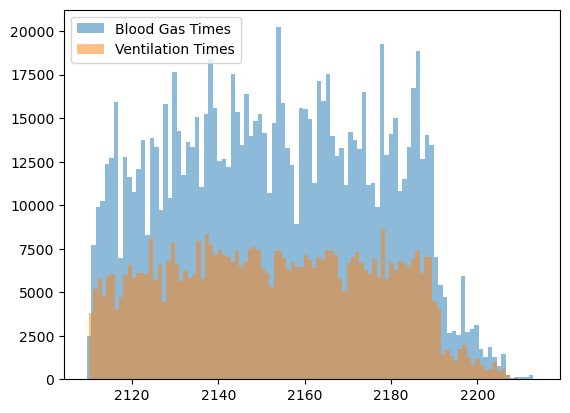

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.hist(bloodgas['charttime'], bins=100, alpha=0.5, label='Blood Gas Times')
plt.hist(ventilation['charttime'], bins=100, alpha=0.5, label='Ventilation Times')
plt.legend()
plt.show()

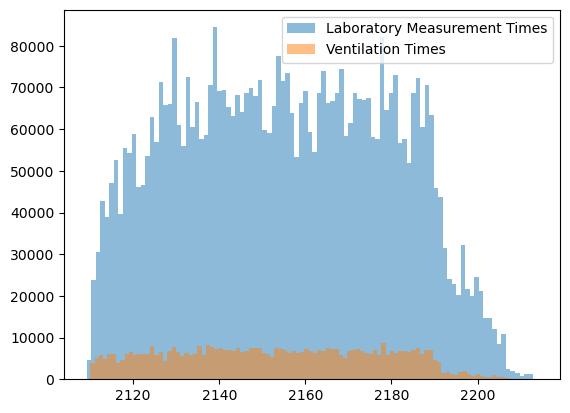

In [92]:
plt.hist(lab['charttime'], bins=100, alpha=0.5, label='Laboratory Measurement Times')
plt.hist(ventilation['charttime'], bins=100, alpha=0.5, label='Ventilation Times')
plt.legend()
plt.show()

In [93]:
combined.shape

(1723688, 8)

In [94]:
duration_df = (
    combined
    .groupby(['subject_id', 'stay_id'])['charttime']
    .agg(start_time='min', end_time='max')
    .reset_index()
)

# Calculate duration in hours for each subject/stay
duration_df['duration_hours'] = (duration_df['end_time'] - duration_df['start_time']).dt.total_seconds() / 3600

# Compute summary statistics
mean_duration = duration_df['duration_hours'].mean()
min_duration = duration_df['duration_hours'].min()
max_duration = duration_df['duration_hours'].max()

# Display results
print(f"Mean Duration: {mean_duration:.2f} hours")
print(f"Min Duration: {min_duration:.2f} hours")
print(f"Max Duration: {max_duration:.2f} hours")

Mean Duration: 22.58 hours
Min Duration: 0.00 hours
Max Duration: 24.00 hours


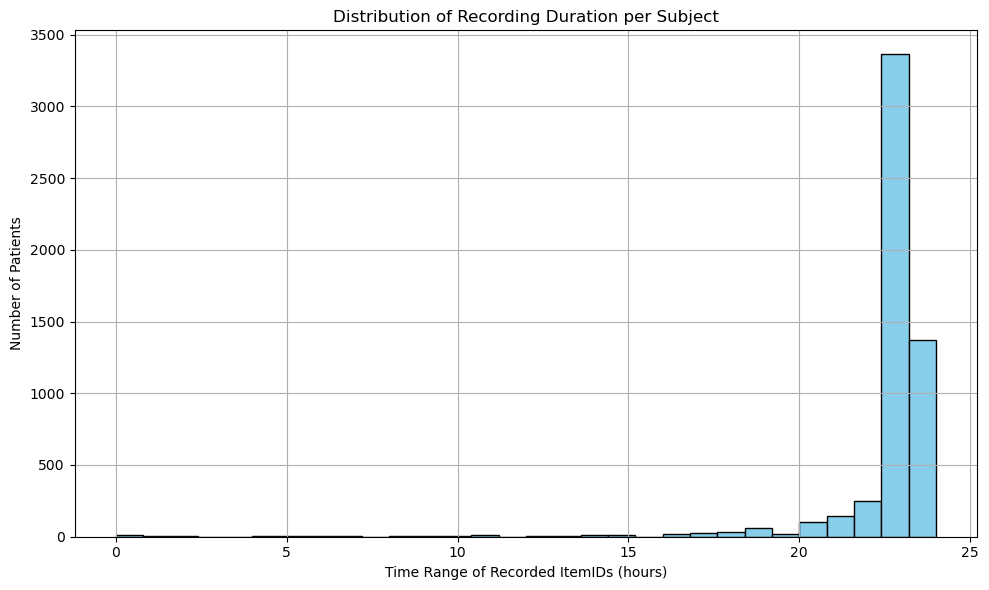

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

duration_df = (
    combined
    .groupby(['subject_id', 'stay_id'])['charttime']
    .agg(['min', 'max'])
    .reset_index()
)

# Calculate duration in hours
duration_df['duration_hours'] = (duration_df['max'] - duration_df['min']).dt.total_seconds() / 3600

# Plot histogram (use more bins to show distribution)
plt.figure(figsize=(10, 6))
plt.hist(duration_df['duration_hours'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Time Range of Recorded ItemIDs (hours)')
plt.ylabel('Number of Patients')
plt.title('Distribution of Recording Duration per Subject')
plt.grid(True)
plt.tight_layout()
plt.show()

In [96]:
print(f"Total number of patients in train set: {len(combined['subject_id'].unique())}")

Total number of patients in train set: 5466


In [97]:
# Remove patients with < 20h data

duration_df = (
    combined
    .groupby(['subject_id', 'stay_id'])['charttime']
    .agg(start_time='min', end_time='max')
    .reset_index()
)

# Calculate duration in hours
duration_df['duration_hours'] = (
    (duration_df['end_time'] - duration_df['start_time']).dt.total_seconds() / 3600
)

# Filter to keep only combinations with at least 20 hours
valid_stays = duration_df[duration_df['duration_hours'] >= 20][['subject_id', 'stay_id']]

# Filter ventilation6 using only valid subject_id & stay_id
combined_filtered = combined.merge(valid_stays, on=['subject_id', 'stay_id'], how='inner')

# Reset index
combined = combined_filtered.reset_index(drop=True)
combined.shape

(1677065, 8)

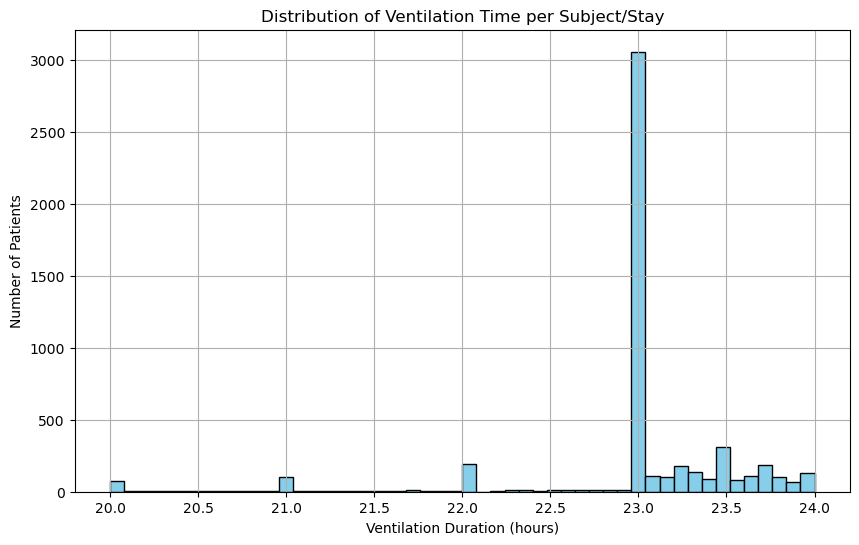

In [98]:
# Group by subject_id and stay_id and compute duration
duration_df = (
    combined
    .groupby(['subject_id', 'stay_id'])['charttime']
    .agg(['min', 'max'])
    .reset_index()
)

# Calculate duration in hours
duration_df['duration_hours'] = (duration_df['max'] - duration_df['min']).dt.total_seconds() / 3600

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(duration_df['duration_hours'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Ventilation Duration (hours)')
plt.ylabel('Number of Patients')
plt.title('Distribution of Ventilation Time per Subject/Stay')
plt.grid(True)
plt.show()

In [99]:
# Group by subject_id, stay_id, and itemid, count number of samples
group_counts = (
    combined
    .groupby(['subject_id', 'stay_id', 'itemid'])
    .size()
    .reset_index(name='sample_count')
)

# Compute average sample count per itemid
avg_samples = (
    group_counts
    .groupby('itemid')['sample_count']
    .mean()
    .reset_index(name='avg_samples_per_subject_stay')
)

# If 'label' exists and is associated uniquely with itemid, merge it in
if 'label' in combined.columns:
    itemid_label_map = combined[['itemid', 'label']].drop_duplicates()
    avg_samples = avg_samples.merge(itemid_label_map, on='itemid', how='left')

# Reorder columns if needed
avg_samples = avg_samples[['itemid', 'label', 'avg_samples_per_subject_stay']] if 'label' in avg_samples.columns else avg_samples

avg_samples

,itemid,label,avg_samples_per_subject_stay
0,50802,Base Excess,3.300922
1,50803,"Calculated Bicarbonate, Whole Blood",1.333333
2,50806,"Chloride, Whole Blood",1.654321
3,50809,Glucose,2.766744
4,50810,"Hematocrit, Calculated",1.694524
...,...,...,...
59,224701,PSV Level,5.711501
60,224716,SBT Stopped,1.472050
61,224738,Inspiratory Time,4.181786
62,228096,Richmond-RAS Scale,5.892097


In [100]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(avg_samples)

    itemid                                  label  \
0    50802                            Base Excess   
1    50803    Calculated Bicarbonate, Whole Blood   
2    50806                  Chloride, Whole Blood   
3    50809                                Glucose   
4    50810                 Hematocrit, Calculated   
5    50811                             Hemoglobin   
6    50813                                Lactate   
7    50818                                   pCO2   
8    50820                                     pH   
9    50821                                    pO2   
10   50822                 Potassium, Whole Blood   
11   50824                    Sodium, Whole Blood   
12   50861         Alanine Aminotransferase (ALT)   
13   50862                                Albumin   
14   50863                   Alkaline Phosphatase   
15   50885                       Bilirubin, Total   
16   50889                     C-Reactive Protein   
17   50893                         Calcium, To

In [101]:
combined1 = combined.copy()

In [102]:
# Remove features that appear rarely

combined1 = combined1[
    ~combined1['label'].isin(['SBT Stopped', 'Plateau Pressure', 'Inspiratory Time', 'Respiratory Rate (Set)', 'Calculated Bicarbonate, Whole Blood', 'Chloride, Whole Blood', 'Glucose', 'Hematocrit, Calculated', 'Hemoglobin', 'Potassium, Whole Blood', 'Sodium, Whole Blood'])
]

In [103]:
combined1.head()

,subject_id,stay_id,charttime,itemid,value,valuenum,label,ext_success
0,10002428,38875437,2156-04-21 18:00:00,220210,22,22.0,Respiratory Rate,1
1,10002428,38875437,2156-04-21 18:00:00,220045,111.0,111.0,Heart Rate,1
2,10002428,38875437,2156-04-21 18:00:00,220050,104.0,104.0,Arterial Blood Pressure systolic,1
3,10002428,38875437,2156-04-21 18:00:00,220051,55.0,55.0,Arterial Blood Pressure diastolic,1
4,10002428,38875437,2156-04-21 18:00:00,220052,72.0,72.0,Arterial Blood Pressure mean,1


In [104]:
combined1.shape

(1628524, 8)

In [105]:
nan_counts = combined1.isna().sum()
print(nan_counts)

subject_id          0
stay_id             0
charttime           0
itemid              0
value          308419
valuenum            0
label               0
ext_success         0
dtype: int64


In [106]:
combined1 = combined1 [['subject_id', 'stay_id', 'charttime', 'itemid', 'valuenum', 'label', 'ext_success']]

In [107]:
combined1.head()

,subject_id,stay_id,charttime,itemid,valuenum,label,ext_success
0,10002428,38875437,2156-04-21 18:00:00,220210,22.0,Respiratory Rate,1
1,10002428,38875437,2156-04-21 18:00:00,220045,111.0,Heart Rate,1
2,10002428,38875437,2156-04-21 18:00:00,220050,104.0,Arterial Blood Pressure systolic,1
3,10002428,38875437,2156-04-21 18:00:00,220051,55.0,Arterial Blood Pressure diastolic,1
4,10002428,38875437,2156-04-21 18:00:00,220052,72.0,Arterial Blood Pressure mean,1


In [108]:
nan_counts = combined1.isna().sum()
print(nan_counts)

subject_id     0
stay_id        0
charttime      0
itemid         0
valuenum       0
label          0
ext_success    0
dtype: int64


In [109]:
from sklearn.model_selection import train_test_split

In [110]:
def calculate_patient_synthetic_data_proportion(patient_data, target_frequency=13):
    patient_synthetic_data_proportion = {}
    for patient_id, group in patient_data.groupby('subject_id'):
        observed_count = group['label'].count()
        total_expected = len(group) * target_frequency
        synthetic_count = total_expected - observed_count
        synthetic_proportion = synthetic_count / total_expected
        patient_synthetic_data_proportion[patient_id] = synthetic_proportion
    return patient_synthetic_data_proportion  

In [111]:
def create_synthetic_data_proportion_df(patient_data):
    synthetic_data_proportion = calculate_patient_synthetic_data_proportion(patient_data)
    synthetic_df = pd.DataFrame(list(synthetic_data_proportion.items()), columns=['subject_id', 'synthetic_proportion'])
    return synthetic_df

In [112]:
def stratified_split(patient_data, test_size=0.2, random_state=42):
    synthetic_df = create_synthetic_data_proportion_df(patient_data)
    train_ids, test_ids = train_test_split(
        synthetic_df['subject_id'],
        test_size=test_size,
        random_state=random_state,
        stratify=synthetic_df['synthetic_proportion']
    )
    train_data = patient_data[patient_data['subject_id'].isin(train_ids)]
    test_data = patient_data[patient_data['subject_id'].isin(test_ids)]
    return train_data, test_data

In [113]:
# Split into train and test data
train_data, test_data = stratified_split(combined1, test_size=0.2, random_state=42)

print(f"Total number of patients in train set: {len(train_data['subject_id'].unique())}")
print(f"Total number of patients in test set: {len(test_data['subject_id'].unique())}")

Total number of patients in train set: 4161
Total number of patients in test set: 1041


In [114]:
def compare_class_distributions(train_df, test_df, target_col):
    train_class_distribution = train_df[target_col].value_counts(normalize=True)
    test_class_distribution = test_df[target_col].value_counts(normalize=True)

    print("Train Class Distribution:")
    print(train_class_distribution)
    print("\nTest Class Distribution:")
    print(test_class_distribution)

In [115]:
# Outcome proportions between test and train datasets

compare_class_distributions(train_data, test_data, 'ext_success')

Train Class Distribution:
ext_success
1    0.777082
0    0.222918
Name: proportion, dtype: float64

Test Class Distribution:
ext_success
1    0.762691
0    0.237309
Name: proportion, dtype: float64


In [116]:
# Define the neurology labels to extract
neurology_labels = ["GCS - Eye Opening", "GCS - Verbal Response", "GCS - Motor Response", "Richmond-RAS Scale"]

# Create neurology DataFrames
neurology_train = train_data[train_data['label'].isin(neurology_labels)].copy()
neurology_test = test_data[test_data['label'].isin(neurology_labels)].copy()

# Remove neurology rows from original train/test
train_data = train_data[~train_data['label'].isin(neurology_labels)].copy()
test_data = test_data[~test_data['label'].isin(neurology_labels)].copy()

In [117]:
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler

# Copy original data
neurology_train1 = neurology_train.copy()
neurology_test1 = neurology_test.copy()

### --- RAS Scaling --- ###
# Isolate Richmond-RAS Scale rows (train)
rass_label = "Richmond-RAS Scale"
rass_train_mask = neurology_train1['label'] == rass_label
rass_train_data = neurology_train1.loc[rass_train_mask, ['valuenum']]

# Fit scaler on train only
rass_scaler = MaxAbsScaler()
rass_scaled_train = rass_scaler.fit_transform(rass_train_data)

# Assign to train
neurology_train1.loc[rass_train_mask, 'valuenum_normalized'] = rass_scaled_train

# Isolate Richmond-RAS Scale rows (test)
rass_test_mask = neurology_test1['label'] == rass_label
rass_test_data = neurology_test1.loc[rass_test_mask, ['valuenum']]

# Transform test using train-fitted scaler
rass_scaled_test = rass_scaler.transform(rass_test_data)

# Assign to test
neurology_test1.loc[rass_test_mask, 'valuenum_normalized'] = rass_scaled_test

### --- GCS Scaling --- ###
# GCS labels
gcs_labels = ["GCS - Eye Opening", "GCS - Verbal Response", "GCS - Motor Response"]

# Isolate GCS rows (train)
gcs_train_mask = neurology_train1['label'].isin(gcs_labels)
gcs_train_data = neurology_train1.loc[gcs_train_mask, ['valuenum']]

# Fit scaler on train only
gcs_scaler = MinMaxScaler()
gcs_scaled_train = gcs_scaler.fit_transform(gcs_train_data)

# Assign to train
neurology_train1.loc[gcs_train_mask, 'valuenum_normalized'] = gcs_scaled_train

# Isolate GCS rows (test)
gcs_test_mask = neurology_test1['label'].isin(gcs_labels)
gcs_test_data = neurology_test1.loc[gcs_test_mask, ['valuenum']]

# Transform test using train-fitted scaler
gcs_scaled_test = gcs_scaler.transform(gcs_test_data)

# Assign to test
neurology_test1.loc[gcs_test_mask, 'valuenum_normalized'] = gcs_scaled_test

In [118]:
import os

neurology_train1.to_csv("/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/neurology_cleaned_train.csv", index=False)
neurology_test1.to_csv("/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/neurology_cleaned_test.csv", index=False)

In [119]:
# Define fluid balance labels to extract
fb_labels = ["Fluid balance"]

# Create fb DataFrames
fb_train = train_data[train_data['label'].isin(fb_labels)].copy()
fb_test = test_data[test_data['label'].isin(fb_labels)].copy()

# Remove fb rows from original train/test
train_data = train_data[~train_data['label'].isin(fb_labels)].copy()
test_data = test_data[~test_data['label'].isin(fb_labels)].copy()

In [120]:
scaler = MaxAbsScaler()
scaler.fit(fb_train[['valuenum']])  # fit only on training data

fb_train['valuenum_normalized'] = scaler.transform(fb_train[['valuenum']])
fb_test['valuenum_normalized'] = scaler.transform(fb_test[['valuenum']])

In [121]:
import os

fb_train.to_csv("/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/fb_cleaned_train.csv", index=False)
fb_test.to_csv("/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/fb_cleaned_test.csv", index=False)

In [122]:
# Normalise each value using MinMaxScalar

scalers = {}
train_normalized = []

for itemid, group in train_data.groupby('itemid'):
    scaler = MinMaxScaler()
    group = group.copy()
    group['valuenum_normalized'] = scaler.fit_transform(group[['valuenum']])
    scalers[itemid] = scaler  # Save the fitted scaler
    train_normalized.append(group)

# Concatenate all normalized train groups
train_data = pd.concat(train_normalized, ignore_index=True)

# Use the same scalers to transform test_data to avoid data leakage
test_normalized = []

for itemid, group in test_data.groupby('itemid'):
    group = group.copy()
    scaler = scalers.get(itemid, None)
    
    if scaler is not None:
        # Only normalize if a scaler was fitted for this itemid
        group['valuenum_normalized'] = scaler.transform(group[['valuenum']])
    else:
        # If no scaler found (e.g., new itemid only in test), you can either:
        # - skip normalization
        # - or fill with NaNs or a placeholder
        group['valuenum_normalized'] = None
    
    test_normalized.append(group)

# Concatenate all normalized test groups
test_data = pd.concat(test_normalized, ignore_index=True)

In [123]:
train_data = train_data[['subject_id', 'stay_id', 'charttime', 'itemid', 'label', 'valuenum_normalized', 'ext_success']]
train_data = train_data.sort_values(by=['subject_id', 'charttime']).reset_index(drop=True)

In [124]:
test_data = test_data[['subject_id', 'stay_id', 'charttime', 'itemid', 'label', 'valuenum_normalized', 'ext_success']]
test_data = test_data.sort_values(by=['subject_id', 'charttime']).reset_index(drop=True)

In [125]:
train_data.shape

(1186959, 7)

In [126]:
test_data.shape

(301714, 7)

In [127]:
import os

train_data.to_csv("/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/combined_cleaned_train.csv", index=False)
test_data.to_csv("/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/combined_cleaned_test.csv", index=False)